# Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#data preprocessing

#training data preprocessing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed = None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links = False,
    crop_to_aspect_ratio=False
)


#validation image preprocessing


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

#building model

In [ ]:
cnn = tf.keras.models.Sequential()

#building convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#compiling and training phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 580s 5s/step - loss: 9.3424 - accuracy: 0.0371 - val_loss: 3.5366 - val_accuracy: 0.0655
Epoch 2/30
98/98 [==============================] - 130s 1s/step - loss: 3.8529 - accuracy: 0.0557 - val_loss: 3.4039 - val_accuracy: 0.1396
Epoch 3/30
98/98 [==============================] - 142s 1s/step - loss: 4.2835 - accuracy: 0.0768 - val_loss: 3.2029 - val_accuracy: 0.1538
Epoch 4/30
98/98 [==============================] - 134s 1s/step - loss: 4.1229 - accuracy: 0.1214 - val_loss: 2.8757 - val_accuracy: 0.2450
Epoch 5/30
98/98 [==============================] - 120s 1s/step - loss: 3.6112 - accuracy: 0.1540 - val_loss: 8.7913 - val_accuracy: 0.1197
Epoch 6/30
98/98 [==============================] - 120s 1s/step - loss: 3.4348 - accuracy: 0.2168 - val_loss: 2.5341 - val_accuracy: 0.4188
Epoch 7/30
98/98 [==============================] - 129s 1s/step - loss: 3.1694 - accuracy: 0.2683 - val_loss: 2.3075 - val_accuracy: 0.5100
Epoch 8/30
98

#saving model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history

{'loss': [9.342360496520996,
  3.8528730869293213,
  4.283517360687256,
  4.122905731201172,
  3.611191511154175,
  3.434753894805908,
  3.169408082962036,
  3.1112499237060547,
  2.651432752609253,
  2.6820342540740967,
  2.4687352180480957,
  2.2777259349823,
  2.7045300006866455,
  1.9416807889938354,
  1.7193517684936523,
  1.6217256784439087,
  1.5388059616088867,
  1.5420751571655273,
  1.3566721677780151,
  1.2928344011306763,
  1.3490873575210571,
  1.4268206357955933,
  1.3766539096832275,
  1.0593746900558472,
  1.1904525756835938,
  1.2193876504898071,
  1.1172199249267578,
  1.061880111694336,
  0.9878184795379639,
  1.0580681562423706],
 'accuracy': [0.0371437706053257,
  0.0557156577706337,
  0.07684918493032455,
  0.12135767191648483,
  0.1540185660123825,
  0.2167787402868271,
  0.26833173632621765,
  0.3195645213127136,
  0.3746397793292999,
  0.40954211354255676,
  0.45341017842292786,
  0.5033621788024902,
  0.5549151301383972,
  0.5798911452293396,
  0.6087095737457

In [ ]:
#recording history
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#calculating accuracy of model achieved on validation set

In [ ]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]))

Validation set accuracy: 0.9230769276618958 %


#Accuracy visualisation

#Training visualisation

In [ ]:
#training_history.history['accuracy']

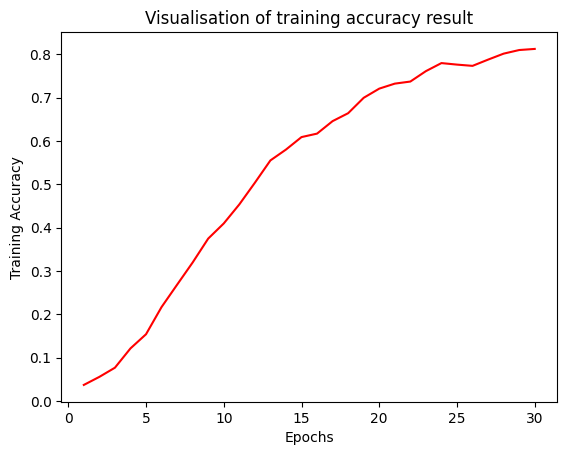

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualisation of training accuracy result')
plt.show()

#Validation Accuracy

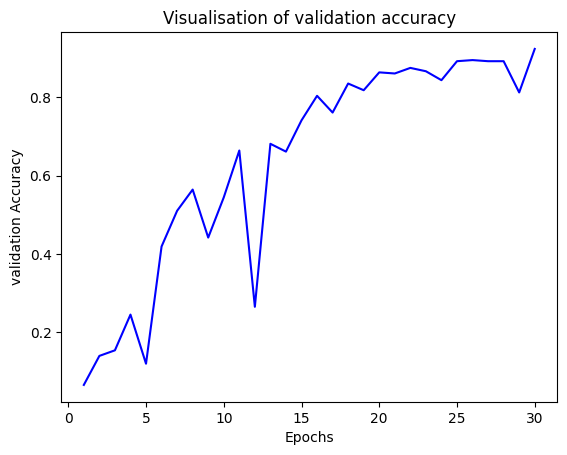

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('validation Accuracy')
plt.title('Visualisation of validation accuracy')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
